In [1]:
import numpy as np
import matplotlib.pyplot as plt

*Load necessary libraries*

In [19]:
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
data_x /= np.max(data_x)
print data_x


[[0.1       ]
 [0.10909091]
 [0.11818182]
 [0.12727273]
 [0.13636364]
 [0.14545455]
 [0.15454545]
 [0.16363636]
 [0.17272727]
 [0.18181818]
 [0.19090909]
 [0.2       ]
 [0.20909091]
 [0.21818182]
 [0.22727273]
 [0.23636364]
 [0.24545455]
 [0.25454545]
 [0.26363636]
 [0.27272727]
 [0.28181818]
 [0.29090909]
 [0.3       ]
 [0.30909091]
 [0.31818182]
 [0.32727273]
 [0.33636364]
 [0.34545455]
 [0.35454545]
 [0.36363636]
 [0.37272727]
 [0.38181818]
 [0.39090909]
 [0.4       ]
 [0.40909091]
 [0.41818182]
 [0.42727273]
 [0.43636364]
 [0.44545455]
 [0.45454545]
 [0.46363636]
 [0.47272727]
 [0.48181818]
 [0.49090909]
 [0.5       ]
 [0.50909091]
 [0.51818182]
 [0.52727273]
 [0.53636364]
 [0.54545455]
 [0.55454545]
 [0.56363636]
 [0.57272727]
 [0.58181818]
 [0.59090909]
 [0.6       ]
 [0.60909091]
 [0.61818182]
 [0.62727273]
 [0.63636364]
 [0.64545455]
 [0.65454545]
 [0.66363636]
 [0.67272727]
 [0.68181818]
 [0.69090909]
 [0.7       ]
 [0.70909091]
 [0.71818182]
 [0.72727273]
 [0.73636364]
 [0.74

*Generate our data*

In [23]:
print np.ones_like(data_x)
data_x = np.hstack((np.ones_like(data_x), data_x))





[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 

*Add intercept data and normalize*

In [11]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]

*Shuffle data and produce train and test sets*

In [12]:
def get_gradient(w, x, y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    mse = (1.0/len(x))*np.sum(np.power(error, 2))
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, mse

*Create gradient function*

In [13]:
w = np.random.randn(2)
alpha = 0.5
tolerance = 1e-5

# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print "Converged."
        break
    
    # Print error every 50 iterations
    if iterations % 100 == 0:
        print "Iteration: %d - Error: %.4f" %(iterations, error)
    
    iterations += 1
    w = new_w

print "w =",w
print "Test Cost =", get_gradient(w, test_x, test_y)[1]

Iteration: 100 - Error: 1.7193
Iteration: 200 - Error: 1.6862
Iteration: 300 - Error: 1.6860
Iteration: 400 - Error: 1.6860
Converged.
w = [-2.08244916 10.76230464]
Test Cost = 1.9349359626813685


*Perform gradient descent to learn model*

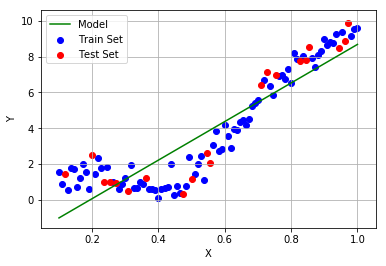

In [14]:
plt.plot(data_x[:,1], data_x.dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

*Plot the model obtained*

/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


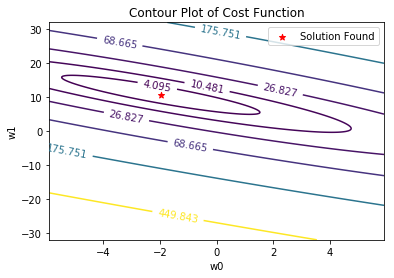

In [8]:
w1 = np.linspace(-w[1]*3, w[1]*3, 300)
w0 = np.linspace(-w[0]*3, w[0]*3, 300)
J_vals = np.zeros(shape=(w1.size, w0.size))

for t1, element in enumerate(w1):
    for t2, element2 in enumerate(w0):
        wT = [0, 0]
        wT[1] = element
        wT[0] = element2
        J_vals[t1, t2] = get_gradient(wT, train_x, train_y)[1]

plt.scatter(w[0], w[1], marker='*', color='r', s=40, label='Solution Found')
CS = plt.contour(w0, w1, J_vals, np.logspace(-10,10,50), label='Cost Function')
plt.clabel(CS, inline=1, fontsize=10)
plt.title("Contour Plot of Cost Function")
plt.xlabel("w0")
plt.ylabel("w1")
plt.legend(loc='best')
plt.show()

*Generate contour plot of the cost function*